In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
path ="/content/global_ai_ml_data_salaries.csv"
df=pd.read_csv(path)
df.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Data Architect,170955,USD,170955,US,0,US,M
1,2024,SE,FT,Data Architect,130270,USD,130270,US,0,US,M
2,2024,MI,FT,Insight Analyst,92144,USD,92144,US,100,US,M
3,2024,MI,FT,Insight Analyst,57616,USD,57616,US,100,US,M


In [ ]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
len(df['company_location'].unique().sum())

164

In [ ]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,40332.000000,4.033200e+04,40332.000000,40332.000000
mean,2023.682832,1.667671e+05,160758.519637,22.570168
std,0.594596,2.281992e+05,72773.970396,41.611669
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df['experience_level'].unique()

array([], dtype=object)

In [ ]:
print(df["job_title"].head())

Series([], Name: job_title, dtype: object)


In [ ]:
df['job_title'].unique()

array(['Data Architect', 'Insight Analyst', 'Lead Engineer',
       'Machine Learning Engineer', 'Data Scientist', 'Manager',
       'Associate', 'Data Engineer', 'Business Intelligence Developer',
       'Product Manager', 'BI Developer', 'Data Analyst',
       'Engineering Manager', 'Research Scientist', 'Software Engineer',
       'Engineer', 'Business Analyst', 'Full Stack Engineer',
       'BI Analyst', 'Software Development Engineer',
       'Data Management Specialist', 'AI Architect',
       'Site Reliability Engineer', 'Data Manager', 'Security Engineer',
       'Business Intelligence Engineer', 'DevOps Engineer',
       'Full Stack Developer', 'Applied Scientist', 'Solutions Architect',
       'Backend Engineer', 'Research Engineer', 'AI Product Manager',
       'Analytics Engineer', 'Infrastructure Engineer',
       'Fullstack Engineer', 'Consultant', 'Quantitative Researcher',
       'Power BI Architect', 'AI Engineer', 'Robotics Engineer',
       'Cloud Database Engineer',

In [ ]:
#drop the unneeded column
del df['employee_residence']
df.head()



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2024,SE,FT,Data Architect,170955,USD,170955,0,US,M
1,2024,SE,FT,Data Architect,130270,USD,130270,0,US,M
2,2024,MI,FT,Insight Analyst,92144,USD,92144,100,US,M
3,2024,MI,FT,Insight Analyst,57616,USD,57616,100,US,M
4,2024,SE,FT,Lead Engineer,201600,USD,201600,100,US,M


In [ ]:
df['job_title'] = df['job_title'].str.lower()
df['job_title']


,job_title
0,data architect
1,data architect
2,insight analyst
3,insight analyst
4,lead engineer
...,...
40327,data scientist
40328,principal data scientist
40329,data scientist
40330,business data analyst


In [ ]:
pattern = 'ai|ml|ds|artificial intelligence|machine learning|data science'
#selecting only the rows that we want to work with
df = df[df['job_title'].str.contains(pattern)]


In [ ]:
df['job_title'].unique()

array(['machine learning engineer', 'ai architect', 'ai product manager',
       'ai engineer', 'machine learning platform engineer',
       'ai solution architect', 'director of machine learning',
       'machine learning researcher', 'ai data scientist', 'ai scientist',
       'ai developer', 'machine learning scientist',
       'machine learning developer', 'machine learning model engineer',
       'ai engineering manager', 'ai specialist', 'ai lead',
       'machine learning architect', 'ml infrastructure engineer',
       'mlops engineer', 'artificial intelligence engineer',
       'ai researcher', 'applied ai ml lead', 'machine learning manager',
       'machine learning infrastructure engineer',
       'ai research scientist', 'machine learning quality engineer',
       'head of ai', 'machine learning modeler', 'ai programmer',
       'machine learning specialist', 'head of machine learning',
       'ai research engineer', 'ai software engineer', 'lead ai engineer',
       'ai s

In [ ]:
len(df)

5341

In [ ]:
#add new column for salary in Saudi Ryial
df['salary_in_sar'] = df['salary_in_usd'] * 3.75
df['salary_in_sar']


,salary_in_sar
6,1111125.00
7,624750.00
8,990750.00
9,536625.00
144,487500.00
...,...
40280,172110.00
40296,277500.00
40307,67698.75
40321,171067.50


In [ ]:
df['salary_in_sar'].describe()

In [ ]:
#Categories the salary to high, medium and low
def salary_classes(salary):
        if salary<=  5.254000e+05:
            return 'low'
        elif  6.750000e+05 < salary >=  5.254000e+05:
            return 'medium'
        else:
             return 'high'
df['salary_classes'] =df['salary_in_sar'].map(salary_classes)
df.head()



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,salary_in_sar,salary_classes
6,2024,SE,FT,machine learning engineer,296300,USD,296300,0,US,M,1111125.0,medium
7,2024,SE,FT,machine learning engineer,166600,USD,166600,0,US,M,624750.0,high
8,2024,SE,FT,machine learning engineer,264200,USD,264200,0,US,M,990750.0,medium
9,2024,SE,FT,machine learning engineer,143100,USD,143100,0,US,M,536625.0,high
144,2024,SE,FT,ai architect,130000,USD,130000,100,US,M,487500.0,low


In [ ]:
#had to hot code the experience level column to use it for finding correlation
def convert(column):
    if str(column) == 'EN':
        return 1
    if str(column) == 'MI':
        return 2
    if str(column) == 'SE':
        return 3
    if str(column) == 'EX':
        return 4
    else:
        return 0
df['experience_level'] = df['experience_level'].apply(convert)


In [ ]:
df['employment_type'].describe()

,employment_type
count,5341
unique,4
top,FT
freq,5321


In [ ]:
#found out that the most of our data is FT (full time) so we dicided to work only with it
df = df[df['employment_type'].str.contains('FT')]


In [ ]:
df['employment_type'].unique

<bound method Series.unique of 6        FT
7        FT
8        FT
9        FT
144      FT
         ..
40280    FT
40296    FT
40307    FT
40321    FT
40324    FT
Name: employment_type, Length: 5321, dtype: object>

In [ ]:
len(df['job_title'].unique())

44

In [ ]:
#creating a list form the job titles to work with it
title_list = df['job_title'].unique()
title_list


array(['machine learning engineer', 'ai architect', 'ai product manager',
       'ai engineer', 'machine learning platform engineer',
       'ai solution architect', 'director of machine learning',
       'machine learning researcher', 'ai data scientist', 'ai scientist',
       'ai developer', 'machine learning scientist',
       'machine learning developer', 'machine learning model engineer',
       'ai engineering manager', 'ai specialist', 'ai lead',
       'machine learning architect', 'ml infrastructure engineer',
       'mlops engineer', 'ai researcher', 'applied ai ml lead',
       'machine learning manager', 'artificial intelligence engineer',
       'machine learning infrastructure engineer',
       'ai research scientist', 'machine learning quality engineer',
       'head of ai', 'machine learning modeler', 'ai programmer',
       'machine learning specialist', 'head of machine learning',
       'ai research engineer', 'ai software engineer', 'lead ai engineer',
       'ai s

In [ ]:
#itrate over the job_title list and set the maximum, minimum for each title and print it
maxy = 0
miny = 0
for title in title_list:
    maxy = max(df[df['job_title']== title]['salary'])
    miny = min(df[df['job_title']== title]['salary'])
    print(f'The Maximum Salary for ({title}) is {maxy} SAR, \nThe Minimum salary is {miny} SAR\n\n')


The Maximum Salary for (machine learning engineer) is 8500000 SAR, 
The Minimum salary is 20000 SAR


The Maximum Salary for (ai architect) is 800000 SAR, 
The Minimum salary is 92000 SAR


The Maximum Salary for (ai product manager) is 259500 SAR, 
The Minimum salary is 93300 SAR


The Maximum Salary for (ai engineer) is 1100000 SAR, 
The Minimum salary is 14400 SAR


The Maximum Salary for (machine learning platform engineer) is 297000 SAR, 
The Minimum salary is 141500 SAR


The Maximum Salary for (ai solution architect) is 283850 SAR, 
The Minimum salary is 120000 SAR


The Maximum Salary for (director of machine learning) is 558700 SAR, 
The Minimum salary is 181000 SAR


The Maximum Salary for (machine learning researcher) is 300200 SAR, 
The Minimum salary is 73100 SAR


The Maximum Salary for (ai data scientist) is 2500000 SAR, 
The Minimum salary is 60000 SAR


The Maximum Salary for (ai scientist) is 1500000 SAR, 
The Minimum salary is 20000 SAR


The Maximum Salary for (ai d

In [ ]:
#select columns to sort in ascending order
goupby_ordar = df[['company_location', 'company_size','salary_in_sar']].sort_values(
    by=['salary_in_sar'], ascending=False)
goupby_ordar


,company_location,company_size,salary_in_sar
26602,CA,M,3000000.00
30204,US,M,2812500.00
28420,US,M,2812500.00
29606,US,M,2812500.00
30210,US,M,2812500.00
...,...,...,...
39422,FR,M,75000.00
40086,IN,S,75000.00
40307,AS,S,67698.75
3523,GR,S,60000.00


In [ ]:
#The average salary regarding to the location of the company and its size.
pivot_table_size_location_salary = df.pivot_table(values=['salary_in_sar'], index=['company_location'], columns= ['company_size'] , aggfunc='mean')
pivot_table_size_location_salary


salary_in_sar                             
company_size                  L             M              S
company_location                                            
AE                337500.000000           NaN  346875.000000
AM                          NaN           NaN  187500.000000
AR                          NaN  4.300762e+05            NaN
AS                          NaN           NaN   67698.750000
AU                323010.750000  6.830610e+05            NaN
BA                          NaN           NaN  281250.000000
BE                          NaN  3.213712e+05            NaN
BG                225000.000000           NaN            NaN
BR                123483.750000  2.503125e+05            NaN
CA                541070.250000  6.399401e+05  637500.000000
CH                241910.625000           NaN  212010.000000
CO                468750.000000  2.273050e+05            NaN
DE                359008.392857  5.326884e+05  208922.812500
DK                          NaN           NaN  172110.000000
EG                          NaN  5.072250e+05            NaN
ES                155200.312500  3.302562e+05  177307.500000
FI                291663.750000  2.808112e+05  236400.000000
FR                315198.750000  3.881091e+05  114986.250000
GB                238146.250000  5.606890e+05  377075.000000
GH                          NaN           NaN  112500.000000
GR                          NaN           NaN   60000.000000
HR                          NaN           NaN  171067.500000
IE                341666.250000  3.645825e+05  256098.750000
IL                984431.250000           NaN  431250.000000
IN                255340.833333  2.437500e+05  256508.750000
IQ                          NaN           NaN  375000.000000
IT                179077.500000           NaN  202440.000000
JP                          NaN           NaN  445382.812500
KR                          NaN           NaN  176250.000000
LT                          NaN  3.241225e+05            NaN
LU                          NaN  2.083312e+05            NaN
LV                          NaN  2.186344e+05            NaN
MX                          NaN  8.250000e+05  135000.000000
NL                294240.000000  2.834138e+05  374998.125000
OM                          NaN  1.756800e+05            NaN
PL                174738.750000  4.351875e+05            NaN
PR                          NaN  6.281250e+05            NaN
PT                157157.812500  2.579250e+05            NaN
QA                          NaN  1.125000e+06            NaN
RO                          NaN  1.457550e+05            NaN
SA                          NaN  4.500000e+05            NaN
SE                342232.500000  3.000000e+05            NaN
SI                 93086.250000           NaN            NaN
TH                 56250.000000           NaN            NaN
TR                          NaN  8.195625e+04   88125.000000
UA                          NaN  5.085000e+05            NaN
US                655308.944805  7.501114e+05  551952.065217
VN                          NaN  2.362500e+05            NaN
ZA                129307.500000  2.005331e+05            NaN

In [ ]:
#pivot table showing the relation between avrage salary and company location
pivot_table_salry_location = df.pivot_table(values=['salary_in_sar'], index=['company_location'] , aggfunc='mean')
pivot_table_salry_location


,salary_in_sar
company_location,
AE,3.437500e+05
AM,1.875000e+05
AR,4.300762e+05
AS,6.769875e+04
AU,6.012314e+05
BA,2.812500e+05
BE,3.213712e+05
BG,2.250000e+05
BR,2.186053e+05


In [ ]:
#the correlation between the expereience level and salaries
correlation = df['experience_level'].corr(df['salary_in_sar'])
correlation


0.25057280674785576

In [ ]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
all_words = " ".join(df['job_title']).split()
word_counts = Counter(all_words) #creat dictoinery to counter all words
word_freq = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False) # use count to count common and show in data fram


In [ ]:
print("common word in the job title")
print(word_freq.head(5))

common word in the job title
         Word  Frequency
2    engineer       4686
0     machine       4616
1    learning       4616
3          ai        628
13  scientist        297


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# definitoin lemmatizer , stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(job_title):
    #Check null or non-string value
    if not isinstance(job_title, str) or pd.isnull(job_title):
        return []  #Return empty list for invalid value

    job_title = re.sub(r'[^a-zA-Z\s]', '', job_title) #Remov non alphab char
    job_title = job_title.lower()  #  to lower case
    tokens = word_tokenize(job_title)  # Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize, remove stopword


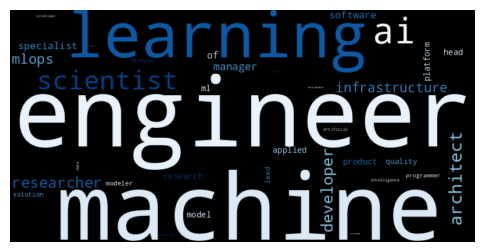

In [ ]:
wordcloud = WordCloud(
width=800,
height=400,
background_color='black', colormap='Blues',contour_width=1,contour_color='white').generate_from_frequencies(word_counts)#Gener WordCloud from word frequencie

#WordCloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()